In [1]:
# PyPortfolioOpt does the hard work for us, allowing for one-liners like ef.min_volatility() to generage
# a portfolio that minimises the volatility, while at the same time allowing for more complex problems
# PyPortfolioOpt documentation says "this is all possible thanks to cvxpy, the python-embedded modelling
# language for complex optimisation upon which PyPortfolioOpt's efficient frontier functionality lies". 

In [2]:
# in these examples demonstrating PyPortfolioOpt's mean-variance capabilities, we start with a list of tickers
# Robert Martin, PyPortfolioOpt's author, suggest between 10-50 stocks as a starting point

In [3]:
# downloading data with yfinance

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
tickers = ["MSFT", "AMZN", "KO", "MA", "COST", "F", "MMM", 
           "LUV", "XOM", "PFE", "JPM", "UNH", "T", "TWTR",
           "ACN", "DIS", "GILD", "F", "TSLA", "BLK", "MS"]

In [5]:
ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  20 of 20 completed


In [6]:
prices = ohlc["Adj Close"]
prices.tail()

,ACN,AMZN,BLK,COST,DIS,F,GILD,JPM,KO,LUV,MA,MMM,MS,MSFT,PFE,T,TSLA,TWTR,UNH,XOM
Date,,,,,,,,,,,,,,,,,,,,
2020-10-20,230.389999,3217.010010,645.070007,378.309998,124.949997,7.74,60.549999,100.370003,50.250000,40.160000,331.720001,170.949997,51.470001,214.649994,37.490002,26.760000,421.940002,46.349998,323.410004,33.700001
2020-10-21,233.100006,3184.939941,634.989990,377.820007,126.629997,7.85,60.209999,99.370003,49.990002,39.840000,333.420013,169.169998,50.380001,214.800003,37.080002,26.719999,422.640015,50.240002,322.790009,33.160000
2020-10-22,228.139999,3176.399902,635.179993,375.750000,127.559998,8.21,60.669998,102.879997,50.680000,41.930000,333.600006,170.710007,51.770000,214.889999,37.430000,28.280001,425.790009,50.279999,325.730011,34.860001
2020-10-23,229.699997,3204.399902,637.309998,374.600006,128.350006,8.16,60.790001,103.809998,50.520000,42.790001,329.609985,169.800003,51.869999,216.229996,38.180000,27.820000,420.630005,50.439999,330.600006,34.160000
2020-10-26,220.699997,3223.165039,621.580017,368.929993,124.764999,7.98,59.586700,101.139999,49.525002,41.361698,319.519897,166.250000,50.270000,212.927704,37.580002,27.305000,417.954987,49.654999,323.225006,33.154999


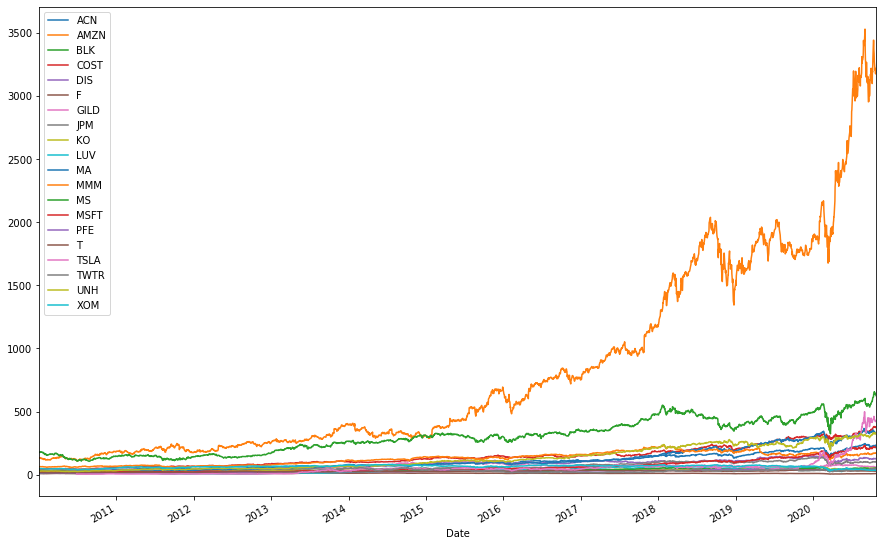

In [7]:
prices[prices.index >= "2010-01-01"].plot(figsize=(15,10)); 

In [8]:
# now we will calculate the covariance matrix, input for the MV portfolio

In [9]:
import pypfopt
pypfopt.__version__

'1.2.6'

In [10]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,ACN,AMZN,BLK,COST,DIS,F,GILD,JPM,KO,LUV,MA,MMM,MS,MSFT,PFE,T,TSLA,TWTR,UNH,XOM
ACN,0.093142,0.045517,0.043523,0.027650,0.041116,0.043939,0.030231,0.050040,0.020450,0.037107,0.045884,0.030511,0.067484,0.040924,0.026575,0.027160,0.039405,0.041764,0.030935,0.031294
AMZN,0.045517,0.346565,0.052672,0.047996,0.056103,0.053208,0.062043,0.069438,0.020710,0.048469,0.057738,0.034879,0.096026,0.072715,0.033095,0.025773,0.055973,0.050725,0.035847,0.027907
BLK,0.043523,0.052672,0.123667,0.033135,0.045852,0.055125,0.034837,0.073816,0.025396,0.044022,0.070909,0.037400,0.092296,0.042182,0.030509,0.034416,0.048554,0.042487,0.038400,0.037032
COST,0.027650,0.047996,0.033135,0.103566,0.032638,0.031522,0.028024,0.039937,0.021820,0.032206,0.033362,0.025384,0.050226,0.037271,0.026054,0.023301,0.022507,0.022266,0.027798,0.021200
DIS,0.041116,0.056103,0.045852,0.032638,0.099369,0.040098,0.033510,0.047167,0.026283,0.038350,0.049855,0.029909,0.068204,0.043151,0.030007,0.027471,0.038547,0.037428,0.032717,0.025162
F,0.043939,0.053208,0.055125,0.031522,0.040098,0.124582,0.030817,0.054414,0.026606,0.045045,0.063578,0.032044,0.079996,0.041540,0.027851,0.029821,0.050171,0.046119,0.029750,0.026924
GILD,0.030231,0.062043,0.034837,0.028024,0.033510,0.030817,0.245784,0.044243,0.017181,0.032219,0.034828,0.024539,0.058909,0.036698,0.033424,0.022060,0.035347,0.027811,0.035108,0.021688
JPM,0.050040,0.069438,0.073816,0.039937,0.047167,0.054414,0.044243,0.130535,0.028014,0.048683,0.072930,0.035770,0.118442,0.050773,0.033556,0.035607,0.041501,0.040519,0.039569,0.032598
KO,0.020450,0.020710,0.025396,0.021820,0.026283,0.026606,0.017181,0.028014,0.058384,0.023324,0.026298,0.023537,0.032983,0.028819,0.026617,0.022424,0.020378,0.017752,0.023432,0.020753
LUV,0.037107,0.048469,0.044022,0.032206,0.038350,0.045045,0.032219,0.048683,0.023324,0.138970,0.047472,0.029361,0.066580,0.037430,0.026725,0.025273,0.036031,0.036673,0.033530,0.022368


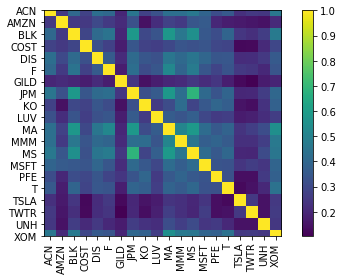

In [11]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

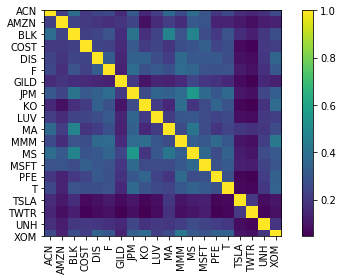

In [12]:
# shrinking the covariance matrix with Ledoit-Wolf shrinkage model:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

In [13]:
# return estimation is another necessary input for the portfolio optimisation. this example uses capm returns, 
# which aims to be slightly more stable than the defult mean historical returns:

from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

ACN     0.215402
AMZN    0.348782
BLK     0.259144
COST    0.193349
DIS     0.219660
F       0.222481
GILD    0.246416
JPM     0.260486
KO      0.149706
LUV     0.222084
MA      0.278920
MMM     0.163275
MS      0.372272
MSFT    0.237423
PFE     0.177496
T       0.155091
TSLA    0.271527
TWTR    0.262502
UNH     0.216740
XOM     0.141880
Name: mkt, dtype: float64

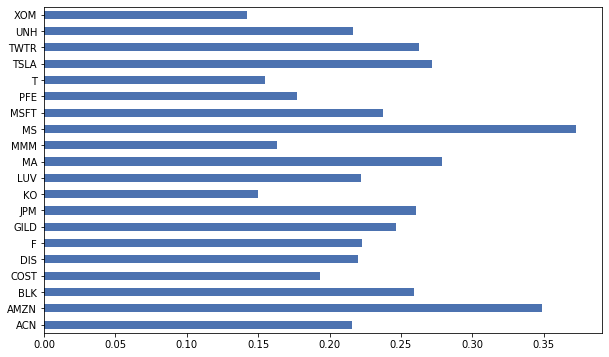

In [14]:
mu.plot.barh(figsize=(10,6));

In [15]:
# when dealing with MVP, constraints to the investments are frequent. long/short min variance is used in
# this example. 

from pypfopt import EfficientFrontier
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

/Users/Grilli/opt/anaconda3/lib/python3.7/site-packages/pypfopt/efficient_frontier.py:112: UserWarning: No expected returns provided. You may only use ef.min_volatility()
  "No expected returns provided. You may only use ef.min_volatility()"


OrderedDict([('ACN', 0.16252),
             ('AMZN', 0.01079),
             ('BLK', 0.04729),
             ('COST', 0.06761),
             ('DIS', -0.0154),
             ('F', -0.01998),
             ('GILD', 0.03297),
             ('JPM', -0.03175),
             ('KO', 0.06685),
             ('LUV', 0.01374),
             ('MA', 0.16175),
             ('MMM', 0.05351),
             ('MS', -0.07423),
             ('MSFT', -0.00841),
             ('PFE', 0.04067),
             ('T', 0.12907),
             ('TSLA', 0.09342),
             ('TWTR', 0.21165),
             ('UNH', 0.02219),
             ('XOM', 0.03574)])

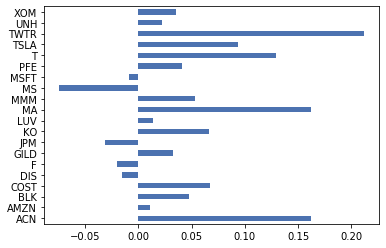

In [16]:
pd.Series(weights).plot.barh();

In [17]:
# the following code outputs a indication of our portfolio's performance. this is as the sample estimate
# and may have very little resemblance to how the portfolio actually performs - theory guides us, but it is
# not perfect. if we are happy with the portfolio, we can construct the actual allocation on the next code

In [18]:
ef.portfolio_performance(verbose=True)

Annual volatility: 10.4%


(None, 0.10364487105108759, None)

In [19]:
# if we had 100,000 to invest and we would like our portfolio to be 125/25 long/short:

In [20]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1] # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000, short_ratio=0.25)
alloc, leftover = da.lp_portfolio()
print("Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with ${leftover:.2f} leftover


{'ACN': 65,
 'BLK': 7,
 'COST': 16,
 'GILD': 49,
 'KO': 118,
 'LUV': 29,
 'MA': 44,
 'MMM': 28,
 'PFE': 95,
 'T': 412,
 'TSLA': 20,
 'TWTR': 371,
 'UNH': 6,
 'XOM': 94,
 'DIS': -20,
 'F': -418,
 'JPM': -52,
 'MS': -247,
 'MSFT': -7}

In [21]:
# Max Sharpe with sector constrints: let's construct a long-only max-sharpe portfolio, incorporating 
# sector constraints. this will require three things - a sector_mapper, your sector_lower and sector_upper bounds

sector_mapper = {
    "ACN": "Tech",
    "BLK": "Financial Services",
    "COST": "Consumer Staples",
    "GILD": "Healthcare",
    "KO": "Consumer Staples",
    "LUV": "Aerospace",
    "MA": "Financial Services",
    "MMM": "Industrials",
    "PFE": "Healthcare",
    "T": "Communication Services",
    "TSLA": "Auto",
    "TWTR": "Communication Services",
    "UNH": "Healthcare",
    "XOM": "Energy",
    "DIS": "Media",
    "F": "Auto",
    "JPM": "Financial Services",
    "MS": "Financial Services",
    "MSFT": "Tech",
    "AMZN": "Tech"
}

sector_lower = {
    "Consumer Staples": 0.1, # at least 10% to staples
    "Tech": 0.05 # at least 5% to tech
    # for all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Tech": 0.2,
    "Aerospace": 0.1,
    "Energy": 0.1,
    "Auto": 0.15
}

In [22]:
# we than set up the optimiser and add the constraints. we can use ef.add_objective() to add other constraints.
# for example, let's say that in addition to the above sector constraints we want: 
# 10% of the portfolio in AMZN
# less than 10% in TSLA:

mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S) # weight_bounds will be set to (0,1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

amzn_index = ef.tickers.index("AMZN")
ef.add_constraint(lambda w: w[amzn_index] == 0.10)

tsla_index = ef.tickers.index("TSLA")
ef.add_constraint(lambda w: w[tsla_index] <= 0.05)

ef.add_constraint(lambda w: w[10] >= 0.05)

ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.08477),
             ('AMZN', 0.1),
             ('BLK', 0.04419),
             ('COST', 0.05146),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.03118),
             ('JPM', 0.0),
             ('KO', 0.04854),
             ('LUV', 0.00199),
             ('MA', 0.26815),
             ('MMM', 0.0),
             ('MS', 0.01249),
             ('MSFT', 0.0),
             ('PFE', 0.00456),
             ('T', 0.0),
             ('TSLA', 0.05),
             ('TWTR', 0.2891),
             ('UNH', 0.01356),
             ('XOM', 0.0)])

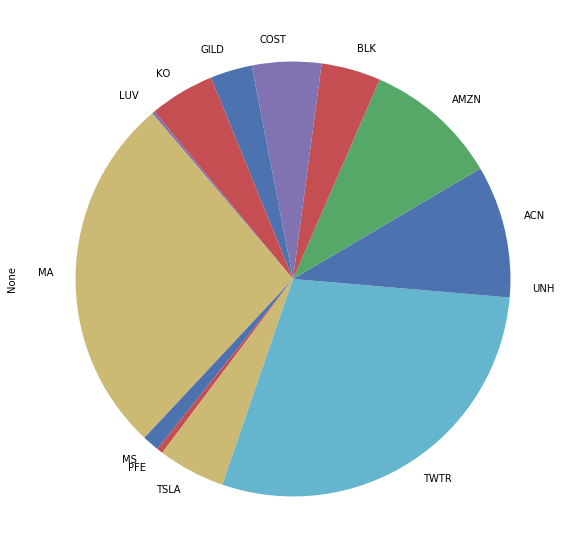

In [23]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [24]:
# we can immediately see that our explicit constraints were satisfied, and check the sector constraints:

In [25]:
# O(N^2) loop not a good idea in a coding interview aha
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Media: 0.000
Tech: 0.185
Healthcare: 0.049
Aerospace: 0.002
Energy: 0.000
Auto: 0.050
Consumer Staples: 0.100
Communication Services: 0.289
Financial Services: 0.325
Industrials: 0.000


In [26]:
# Maximise the return for a given level of risk, with L2 regularization: "let's imagina that we've put a lot
# of thought into our risk tolerance, and have decided that we can't accept anything more than 15% volatility.
# We can use PyPortfolioOpt to construct a portfolio that maximises return for a given risk:

In [27]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.15)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.0),
             ('AMZN', 0.12451),
             ('BLK', 0.0),
             ('COST', 0.1),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.0),
             ('JPM', 0.0),
             ('KO', 0.0),
             ('LUV', 0.0),
             ('MA', 0.19949),
             ('MMM', 0.0),
             ('MS', 0.22918),
             ('MSFT', 0.0),
             ('PFE', 0.0),
             ('T', 0.0),
             ('TSLA', 0.1277),
             ('TWTR', 0.21912),
             ('UNH', 0.0),
             ('XOM', 0.0)])

In [29]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} ticker have zero weight")

14/20 ticker have zero weight


In [30]:
ef.portfolio_performance(verbose=True);

Expected annual return: 29.6%
Annual volatility: 15.0%
Sharpe Ratio: 1.84


In [31]:
# we might be worried about the fact that, in order to obtain the highest return given a 15% level of 
# volatility, many assets will be assigned zero weight. the optimiser is overfitting the data. 
# we are more likely to get better results by enforcin some level of diversification. L2 regularisation 
# does that, essentially it adds a penalty on the number of near-zero weights. 

In [34]:
from pypfopt import objective_functions

# you must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1) #gamma is the tuning parameter
ef.efficient_risk(0.12)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.06953),
             ('AMZN', 0.06555),
             ('BLK', 0.06413),
             ('COST', 0.05842),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.03757),
             ('JPM', 0.0),
             ('KO', 0.04158),
             ('LUV', 0.00799),
             ('MA', 0.2013),
             ('MMM', 0.0),
             ('MS', 0.06129),
             ('MSFT', 0.00406),
             ('PFE', 0.00176),
             ('T', 0.0),
             ('TSLA', 0.14044),
             ('TWTR', 0.2309),
             ('UNH', 0.0155),
             ('XOM', 0.0)])

In [36]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small} / {len(ef.tickers)} tickers have zero weight")

6 / 20 tickers have zero weight


In [37]:
# "we can tune the value of gamma to choose the number of nonzero tickers. larger gamma pulls
# portfolio weights towards an equal allocation...

In [38]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1) 
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.03905),
             ('AMZN', 0.10574),
             ('BLK', 0.06092),
             ('COST', 0.06091),
             ('DIS', 0.04118),
             ('F', 0.04259),
             ('GILD', 0.05455),
             ('JPM', 0.06159),
             ('KO', 0.03909),
             ('LUV', 0.04239),
             ('MA', 0.07081),
             ('MMM', 0.01298),
             ('MS', 0.11748),
             ('MSFT', 0.05006),
             ('PFE', 0.02009),
             ('T', 0.00889),
             ('TSLA', 0.06711),
             ('TWTR', 0.0626),
             ('UNH', 0.03971),
             ('XOM', 0.00229)])

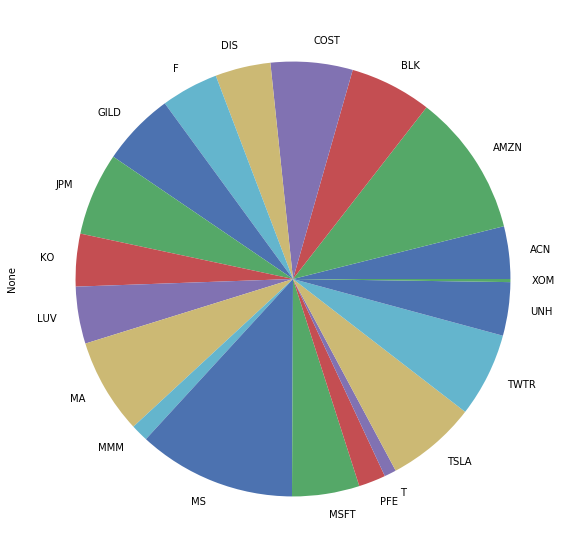

In [39]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [40]:
ef.portfolio_performance(verbose=True);

Expected annual return: 26.2%
Annual volatility: 14.8%
Sharpe Ratio: 1.64


In [41]:
# we can also ge in the situation in which we have a certain required rate of return (actuarial goal for
# pension funds, for instance), but would like to minimise risk. Moreover, suppose we would like our 
# portfolio to be market neutral, in the sense that it is equally exposed to the long and short sides:

In [42]:
# we must add no weight bounds to allow shortsales. 
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', -0.01686),
             ('AMZN', 0.11175),
             ('BLK', 0.02804),
             ('COST', -0.03785),
             ('DIS', -0.00857),
             ('F', -0.00727),
             ('GILD', 0.01421),
             ('JPM', 0.02865),
             ('KO', -0.07904),
             ('LUV', -0.00797),
             ('MA', 0.05028),
             ('MMM', -0.06786),
             ('MS', 0.14136),
             ('MSFT', 0.00671),
             ('PFE', -0.05149),
             ('T', -0.07764),
             ('TSLA', 0.04226),
             ('TWTR', 0.03414),
             ('UNH', -0.01311),
             ('XOM', -0.08976)])

In [43]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 8.0%
Sharpe Ratio: 0.63


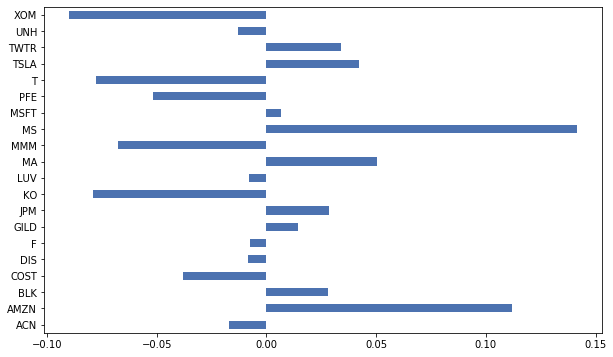

In [44]:
pd.Series(weights).plot.barh(figsize=(10,6));

In [45]:
print(f"Net weight: {sum(weights.values()):.2f}")

Net weight: -0.00


In [46]:
# plotting - to plot the unconstrained efficient frontier, we can use the critical line algorithm

In [47]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 25.7%
Annual volatility: 11.4%
Sharpe Ratio: 2.07


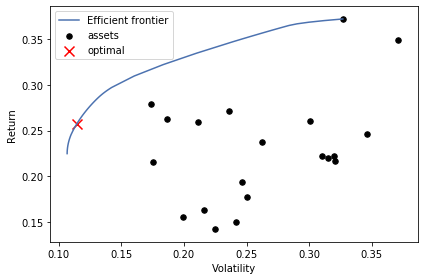

In [48]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [49]:
# finally, PyPortfolioOpt does not support plotting the constrained efficient frontier. 
# it is possible to do this manually by looping over portfolios:

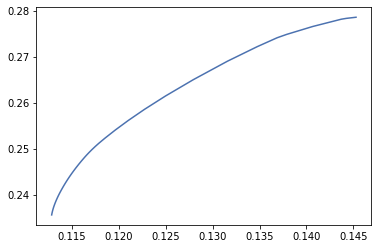

In [51]:
returns, sigmas = [], []
for delta in np.arange(1, 100, 1):
    ef = EfficientFrontier(mu, S, weight_bounds=(0.02, 0.15))
    ef.max_quadratic_utility(delta)
    ret, sigma, _ = ef.portfolio_performance()
    returns.append(ret)
    sigmas.append(sigma)
plt.plot(sigmas, returns);